In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

# FACEBOOK DATASET

In [2]:
df = pd.read_csv('/content/FB.csv')
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# **DATA CLEANING**

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.strftime('%b')
df['Year'] = [d.year for d in df['Date']]
df['month'] = [d.strftime('%b') for d in df.Date]

# **MULTIPLIE BOX PLOT**

Text(0.5, 1.0, 'Multi Month-Wise Box Plot')

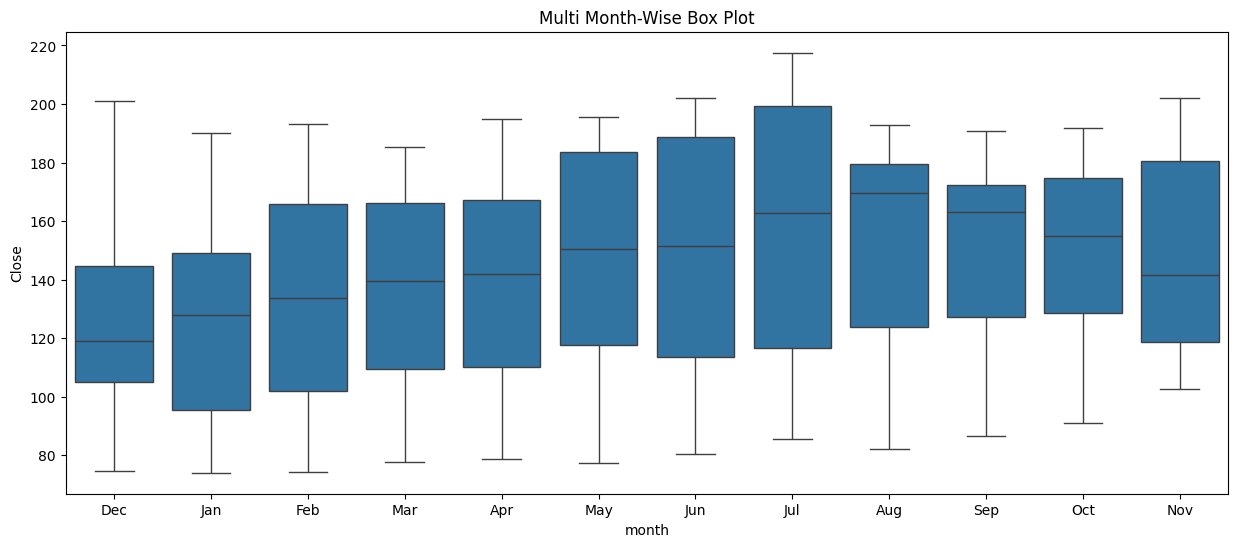

In [4]:
years = df['Year'].unique()
plt.figure(figsize=(15,6))
sns.boxplot(x='month',y='Close',data=df).set_title("Multi Month-Wise Box Plot")

The above box plot shows the monthly changes in the stock price over years ranging from 2014 to 2019.

July being the month which is the most fluctuating while November being the month where there is less changes in the Price.

March,June and May are the most stable months because the mean is between (in middle of) first and thrid Quartile

# **AUTOCORRELATION**

Text(0.5, 1.0, 'Autocorrelation Plot')

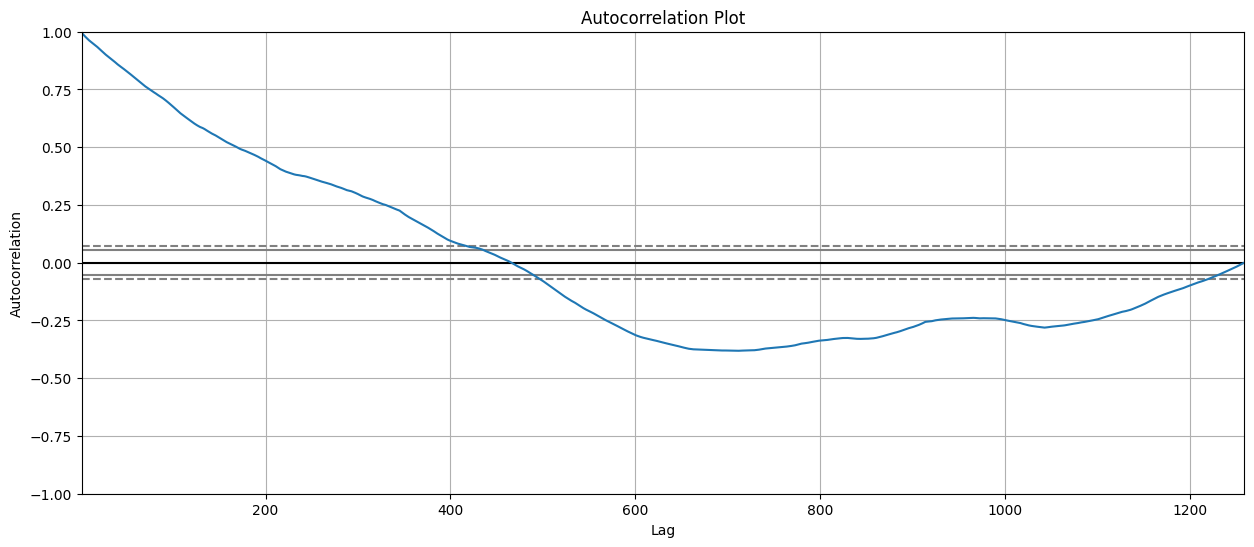

In [5]:
plt.figure(figsize=(15,6))
autocorrelation_plot(df.Close).set_title("Autocorrelation Plot")

From the above Autocorrelation plot we can cay that there is no Seasonality

# **SEASONAL DECOMPOSE**

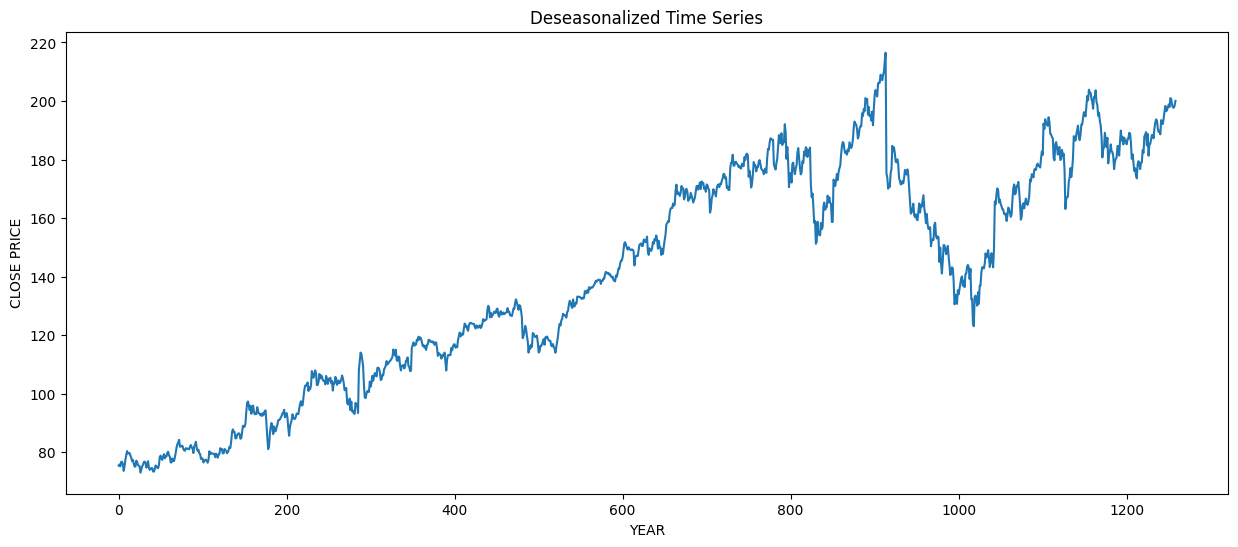

In [6]:
result_mul = seasonal_decompose(df['Close'], model='multiplicative', period=12)
deseason = df['Close'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasonalized Time Series')
plt.xlabel('YEAR')
plt.ylabel('CLOSE PRICE')
plt.show()


The graph displays a deseasonalized time series of a close price over a period, where the seasonal component has been removed from the original data. The x-axis represents the time in years, while the y-axis indicates the close price values. The deseasonalized data reveals the underlying trend and fluctuations in the close price, without the influence of repeating seasonal patterns. The trend shows an overall upward movement with periodic fluctuations, including some sharp increases and decreases, suggesting the presence of both long-term growth and shorter-term volatility in the data.

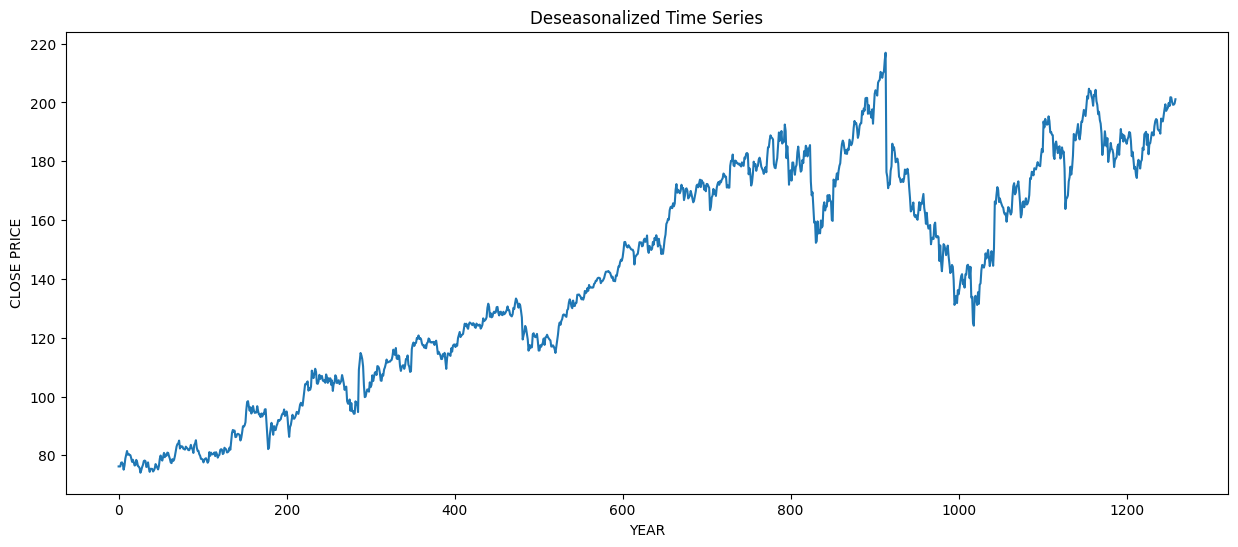

In [7]:
result_add = seasonal_decompose(df['Close'], model='additive', period=12)
deseason = df['Close'] - result_add.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasonalized Time Series')
plt.xlabel('YEAR')
plt.ylabel('CLOSE PRICE')
plt.show()


The graph shows a deseasonalized time series of close prices, created using an additive model to remove the seasonal component. The x-axis represents the time in years, while the y-axis displays the close prices. By subtracting the seasonal component, the graph reveals the underlying trend and variations in the close prices over time. The trend is generally upward, with significant fluctuations and some pronounced peaks and troughs, reflecting the inherent volatility in the data. This deseasonalized series provides a clearer view of the long-term movements without seasonal effects.

# **SEASONAL PLOT**

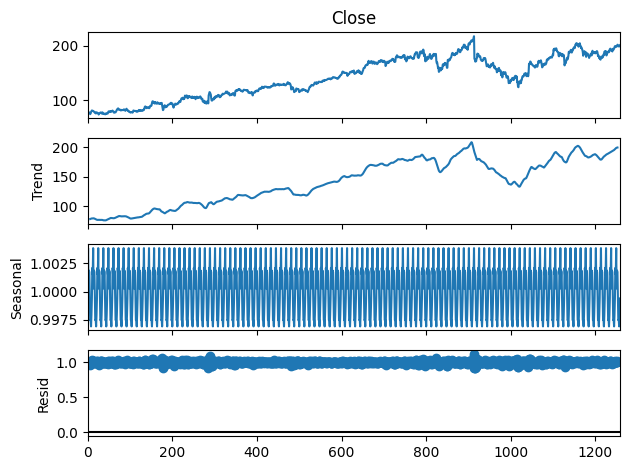

In [8]:
result = seasonal_decompose(df['Close'], model='mul', period=12)
result.plot()
plt.show()

Observed (Close): The original time series data showing the close prices over time.


Trend: The underlying trend component, which captures the long-term movement in the data. This component reveals a general upward trend, with some noticeable fluctuations.


Seasonal: The seasonal component, showing repetitive patterns or cycles within the data at a regular interval, which has been normalized around 1 in this multiplicative model.


Residual (Resid): The residual component, representing the random noise or irregularities after removing the trend and seasonal components. This component shows minor variations around 1, indicating how much of the variation remains unexplained by the trend and seasonal components.

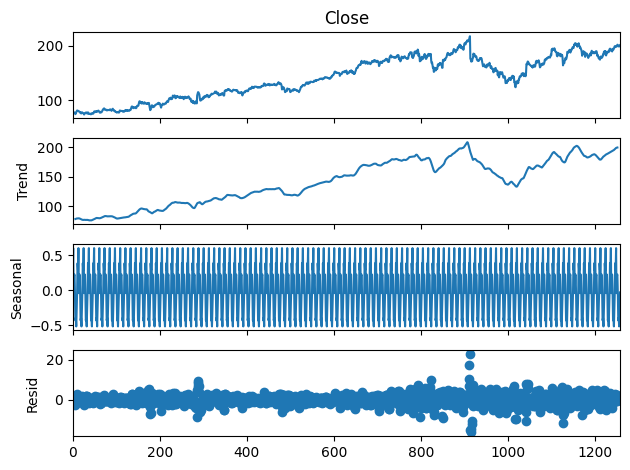

In [9]:
result = seasonal_decompose(df['Close'], model='additive', period=12)
result.plot()
plt.show()

The above graph shows the same components as the code above with the only difference of using an Additive model instead of Multiplicative model

The Multiplicative model is a better choice in this case as it has less variation in Residual

# **TRENDS**

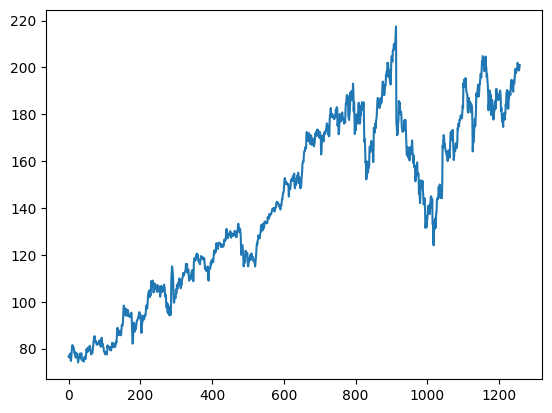

In [10]:
plt.plot(df.Close)

The graph shows a time series of closing prices over time. The prices fluctuate with periods of upward and downward trends, indicating volatility. Overall, there's an upward trajectory with significant peaks and troughs.

# **ISTANBUL STOCK EXCHANGE**

In [11]:
df = pd.read_excel('/content/istambul_stock_exchange.xlsx')
df.columns

Index(['date', 'ISE', 'ISED', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU',
       'EM'],
      dtype='object')

In [12]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.strftime('%b')
df['Year'] = [d.year for d in df['date']]
df['month'] = [d.strftime('%b') for d in df.date]

Text(0.5, 1.0, 'Multi Month-Wise Box Plot')

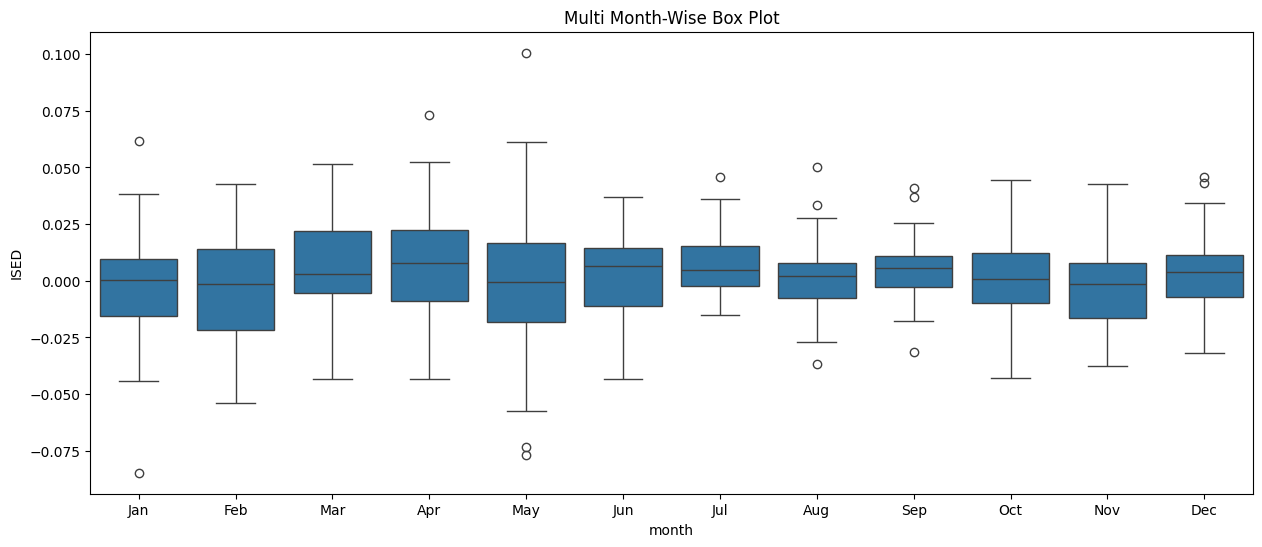

In [13]:
years = df['Year'].unique()
plt.figure(figsize=(15,6))
sns.boxplot(x='month',y='ISED',data=df).set_title("Multi Month-Wise Box Plot")

The image depicts a multi-month box plot, visualizing the distribution of the "ISED" variable across different months. The x-axis represents the months from January to December, and the y-axis represents the values of "ISED". Each box represents a month, showcasing the median (the line within the box), quartiles (the edges of the box), and potential outliers (the dots). This plot effectively compares the distribution of "ISED" across different months, revealing patterns and variations.

Text(0.5, 1.0, 'Autocorrelation Plot')

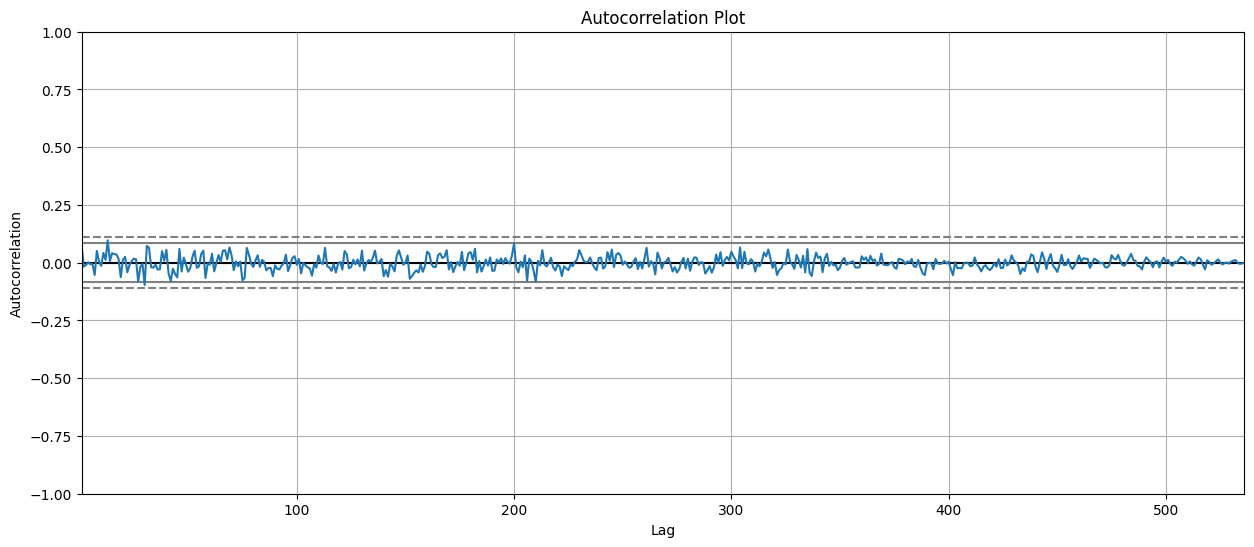

In [14]:
plt.figure(figsize=(15,6))
autocorrelation_plot(df.ISED).set_title("Autocorrelation Plot")

The above autocorrelation plot indicates that there is no corelation

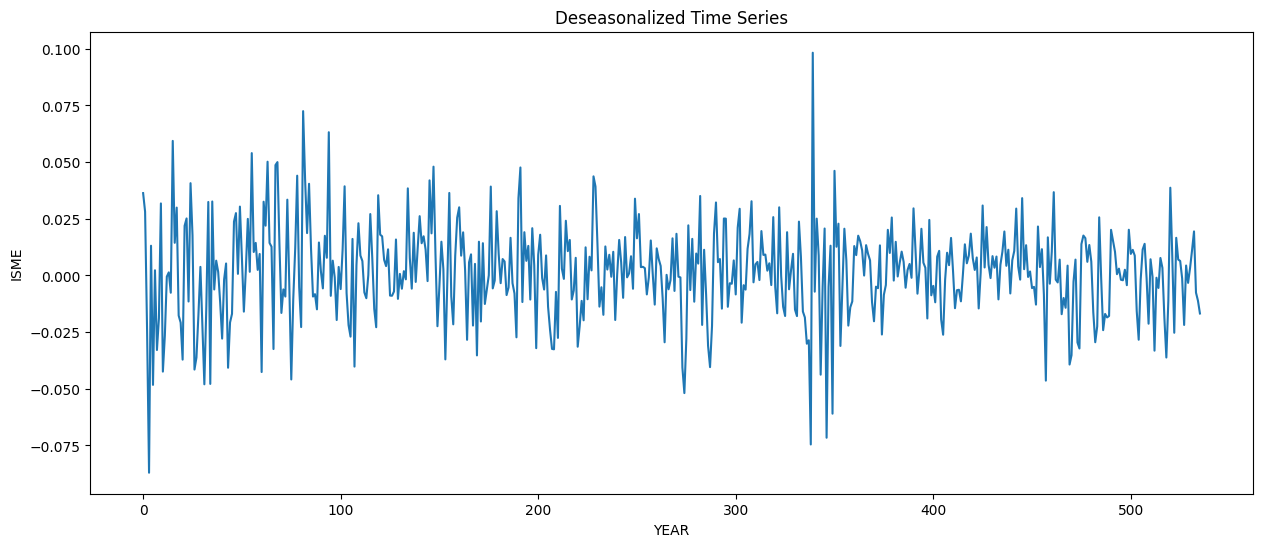

In [19]:
result_mul = seasonal_decompose(df['ISED'], model='additive', period=12)
deseason = df['ISED'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasonalized Time Series')
plt.xlabel('YEAR')
plt.ylabel('ISME')
plt.show()


The plot indicates it shows the deseasonalized time series. This means it removed the seasonal component from the original data, leaving behind the underlying trend and any irregular fluctuations.

The plot depicts the ISED time series after removing the seasonal component, which can help identify trends or patterns not masked by seasonal variations.

X-axis (YEAR): The X-axis represents time in years.


Y-axis (ISME): The Y-axis represents the ISME values, but because this is deseasonalized data, the values likely fluctuate around a central value rather than showing a seasonal pattern.

NOTE: We cannot use Multiplicative model for this attribute because it contains zeros and negative values

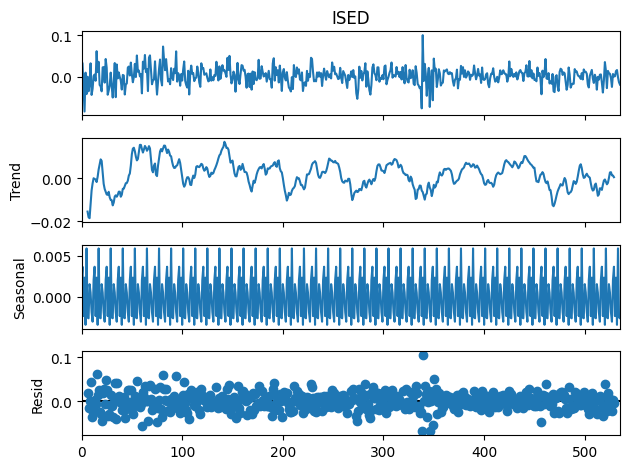

In [21]:
result = seasonal_decompose(df['ISED'], model='additive', period=12)
result.plot()
plt.show()

The plot shows the decomposition of the time series data for your variable, presumably ISED, into three components: trend, seasonality, and residuals.

Trend : This line captures the long-term upward or downward movement in the ISED data. In this plot, the trend is slightly increasing over time.


Seasonality : This line represents the recurring seasonal patterns in the data. Each cycle of the red line corresponds to the seasonal period, which in this case is 12 months (likely representing a yearly seasonality). The red line here suggests that ISED values tend to be higher in the middle of the year compared to the beginning and end.


Residuals : This area shows the difference between the actual data (ISED values) and the sum of the trend and seasonal components. It represents the random fluctuations in the data that are not explained by the trend or seasonality.


By looking at the plot, you can see how these three components contribute to the overall pattern of the ISED data. The trend suggests a general increase, the seasonal component shows a cyclical pattern within a year, and the residuals represent the remaining variability that isn't captured by the trend and seasonality.

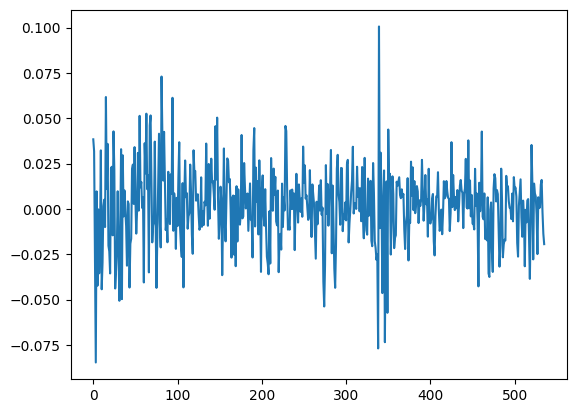

In [23]:
plt.plot(df.ISED)

The provided code snippet visually represents the fluctuations of a variable, named 'ISED', over time. The data points are scattered around the zero line, indicating a lack of a clear trend or pattern. The values oscillate within a specific range, suggesting a degree of variability in the data. Without additional context, it's difficult to determine the exact nature of the variable or the implications of its fluctuations.